# Questions 

# Import, options

In [1]:
import seaborn, pandas
import scipy.stats as stats
import matplotlib, matplotlib.pyplot as plt
import warnings

C:\Users\kja11\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
matplotlib.rcParams.update({'svg.fonttype' : 'none'})
#'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20,'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',                            'figure.figsize':(8, 5), 

In [3]:
file_directory = "/Users/kja11/OneDrive - Menntaský/PostDoc_Hypothermia/in_silico/Python/"

In [4]:
warnings.filterwarnings("ignore", category=FutureWarning)

# Data Download

In [5]:
# Values are Protein abundance by TMT reporter ion intensity
# Stats are ANOVA
# Peptides number = 15487

In [6]:
#data Proteomics
df = pandas.read_csv(file_directory+'1) input/proteomics/Pilot_ProteomicsData.csv', 
                     sep = ',', index_col = 'Gene')
df = df.iloc[:,4:-3]

df.columns = df.columns.str.split('_').str[0]
df_with_tripl = df.copy()
df = df.groupby(axis=1, level=0).median()
df = df[['Ctrl', '3h', '6h', '9h', '12h', '16h']]

print(df.shape, '\n')
df.head(3)

(2405, 6) 



,Ctrl,3h,6h,9h,12h,16h
Gene,,,,,,
DIS3,92.9,96.6,91.6,105.8,103.0,115.5
LARP1,103.3,106.6,103.5,99.1,95.3,93.2
ACTB,100.9,107.1,102.3,94.4,93.9,100.4


# Data transformation

## To Zscore 

In [8]:
# Convert to Z_score
df_zscore = stats.zscore(df, axis = 0)
df_zscore.head(2)

,Ctrl,3h,6h,9h,12h,16h
Gene,,,,,,
DIS3,-1.092419,-0.367305,-1.569021,0.917407,0.601398,2.127101
LARP1,0.748607,1.131631,0.843713,-0.246745,-0.859439,-1.056857


# Methods

## Slope of all the proteins identified

## SUMO 

In [9]:
# Select the targets
patterns = ['SUMO', 'SAE', 'UBC9', 'PIAS', 'RanBP2', 'SENP', 'SIM']
df_targets_sumo = df_with_tripl[df_with_tripl.index.str.contains('|'.join(patterns))]
df_targets_sumo

,Ctrl,Ctrl,Ctrl,3h,3h,3h,6h,6h,6h,9h,9h,9h,12h,12h,12h,16h,16h,16h
Gene,,,,,,,,,,,,,,,,,,
SENP3,92.0,95.9,94.9,93.7,97.1,103.4,96.3,100.5,101.3,111.9,114.3,101.0,102.1,102.5,107.5,90.1,106.1,89.6
SUMO1,102.8,94.3,95.2,94.3,92.9,100.5,102.7,94.7,95.7,101.1,107.0,94.6,105.0,105.0,103.2,107.0,108.7,95.4
SAE1,93.2,97.5,98.2,103.1,102.1,98.7,101.1,105.0,96.2,102.3,108.2,101.0,99.1,99.2,101.0,87.9,107.8,98.4
SUMO2,88.2,107.3,97.7,97.2,110.8,106.9,97.0,102.8,99.5,97.6,101.6,104.8,97.2,106.2,93.9,88.2,111.1,91.9


    Gene conditions  value
0  SENP3       Ctrl   92.0
1  SUMO1       Ctrl  102.8
2   SAE1       Ctrl   93.2
3  SUMO2       Ctrl   88.2
4  SENP3       Ctrl   95.9 



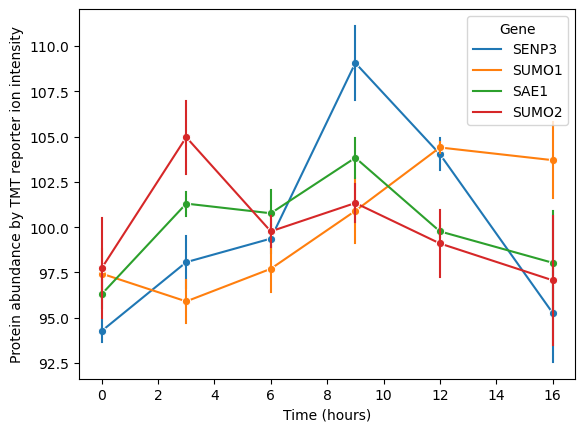

In [10]:
# From Wide to Long table
df_targets_sumo = df_targets_sumo.reset_index()
df_targets_sumo = df_targets_sumo.melt(id_vars=["Gene"], var_name="conditions")

## pull the technical triplicate
df_targets_sumo['conditions'] = df_targets_sumo['conditions'].str.split('_').str[0]
print(f'{df_targets_sumo.head()} \n')

# Print linregess results for the targets
df_targets2 = df_targets_sumo.copy()
df_targets2['conditions'].replace({'Ctrl': 0, '3h': 3, '6h': 6, 
                                  '9h': 9, '12h': 12, '16h': 16, }, inplace=True)

seaborn.lineplot(data = df_targets2, x='conditions' , y='value', hue= "Gene",
                marker='o',err_style="bars", errorbar=('se', 0.5))

plt.ylabel("Protein abundance by TMT reporter ion intensity")
plt.xlabel("Time (hours)")
plt.show()
plt.close()

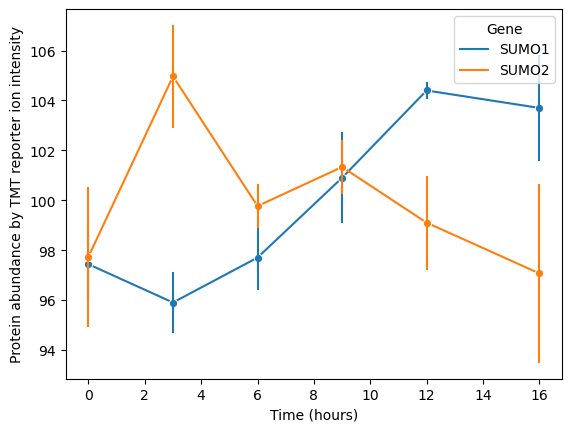

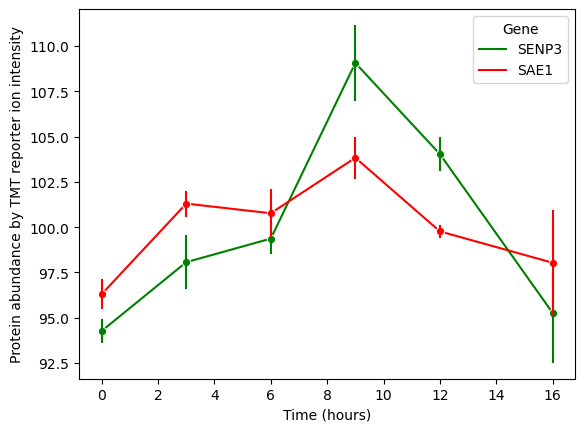

In [11]:
# Print linregess results for the targets
df_targets_sumo1 = df_targets2[ (df_targets2['Gene'] == 'SUMO1') | (df_targets2['Gene'] == 'SUMO2') ]
df_targets_sumo2 = df_targets2[ (df_targets2['Gene'] == 'SENP3') | (df_targets2['Gene'] == 'SAE1') ]

seaborn.lineplot(data = df_targets_sumo1, x='conditions' , y='value', hue= "Gene",
                 marker='o',err_style="bars", errorbar=('se', 0.5))

plt.ylabel("Protein abundance by TMT reporter ion intensity")
plt.xlabel("Time (hours)")
plt.show()
plt.close()

seaborn.lineplot(data = df_targets_sumo2, x='conditions' , y='value', hue= "Gene",
                 marker='o',err_style="bars", errorbar=('se', 0.5), palette=['green', 'red'])

plt.ylabel("Protein abundance by TMT reporter ion intensity")
plt.xlabel("Time (hours)")
plt.show()
plt.close()

## Ubiquitin

In [12]:
# Select the targets Key ubiquitin proteins
E123_prot = 'UBE1', '\\bUBA1\\b', 'UBC4', 'UBC5', 'UBCH7', 'Mdm2', 'APC/C', 'RING1'
Proteasome_prot = 'PSMA', 'PSMB'
DUB = 'USP'


df_targets_E123 = df_with_tripl[df_with_tripl.index.str.contains('|'.join(E123_prot),regex=True)]
df_targets_DUBs = df_with_tripl[df_with_tripl.index.str.contains('USP')]
df_targets_DUBs = df_targets_DUBs.drop('DUSP3') #not ubiquitin
df_targets_proteasome = df_with_tripl[df_with_tripl.index.str.contains('|'.join(Proteasome_prot),regex=True)]


df_targets_E123 

,Ctrl,Ctrl,Ctrl,3h,3h,3h,6h,6h,6h,9h,9h,9h,12h,12h,12h,16h,16h,16h
Gene,,,,,,,,,,,,,,,,,,
RING1,93.5,100.5,88.3,84.1,85.6,99.9,98.1,90.4,93.6,110.5,105.7,109.4,103.2,107.2,109.7,104.2,112.4,103.8
UBA1,90.5,101.6,95.0,97.6,97.2,100.8,102.4,102.5,95.2,102.9,107.4,99.2,100.2,101.2,108.0,87.7,110.5,100.0


    Gene conditions  value
0  RING1       Ctrl   93.5
1   UBA1       Ctrl   90.5
2  RING1       Ctrl  100.5
3   UBA1       Ctrl  101.6
4  RING1       Ctrl   88.3 



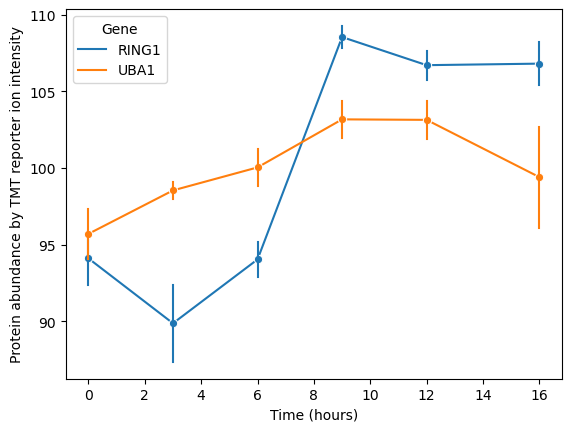

    Gene conditions  value
0  USP39       Ctrl   97.8
1  USP48       Ctrl  106.2
2  USP24       Ctrl   76.7
3  USP47       Ctrl   90.0
4  USP9X       Ctrl   88.9 



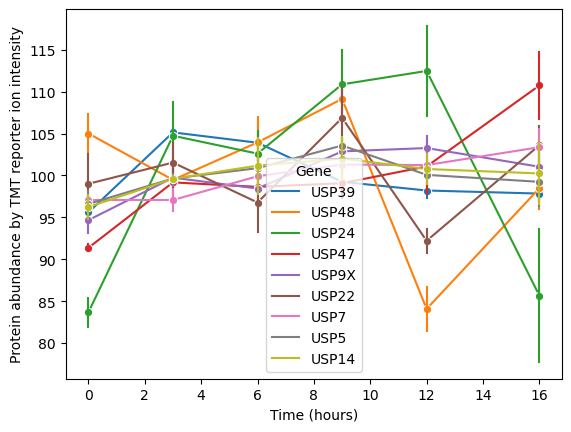

    Gene conditions  value
0  PSMA2       Ctrl  103.6
1  PSMA7       Ctrl   93.4
2  PSMA5       Ctrl  100.6
3  PSMB6       Ctrl   86.2
4  PSMA6       Ctrl   95.2 



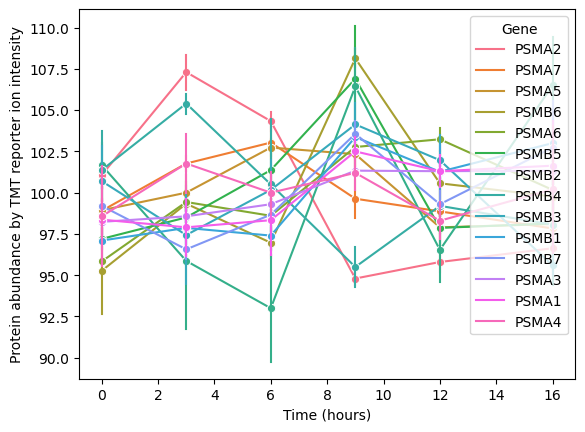

In [13]:
dfs = df_targets_E123, df_targets_DUBs, df_targets_proteasome 

for df_targets_ubi in dfs:
    
    # From Wide to Long table
    df_targets_ubi = df_targets_ubi.reset_index()
    df_targets_ubi = df_targets_ubi.melt(id_vars=["Gene"], var_name="conditions")

    ## pull the technical triplicate
    df_targets_ubi['conditions'] = df_targets_ubi['conditions'].str.split('_').str[0]
    print(f'{df_targets_ubi.head()} \n')

    # Print linregess results for the targets
    df_targets2 = df_targets_ubi.copy()
    
    # Replace 'inf' with 'NaN' in your DataFrame
    df_targets2['conditions'].replace({'Ctrl': 0, '3h': 3, '6h': 6, 
                                      '9h': 9, '12h': 12, '16h': 16, }, inplace=True)

    seaborn.lineplot(data = df_targets2, x='conditions' , y='value', hue= "Gene",
                    marker='o',err_style="bars", errorbar=('se', 0.5))

    plt.ylabel("Protein abundance by TMT reporter ion intensity")
    plt.xlabel("Time (hours)")
    plt.show()
    plt.close()